# Команда 4. Вакансии с портала HeadHunter

### Описание данных
* Датасет включает в себя данные об IT-вакансиях, размещенных на портале Headhunter
* Временной период: 18 сентября 2023 года - 17 октября 2023
* Целевая переменная - предлагаемая зарплата
* Источник данных: [Kaggle](https://www.kaggle.com/datasets/ilyazawilsiv/it-vacancies-from-headhunter-website)
* [Ссылка для скачивания](https://drive.google.com/file/d/1AnXq1ZxM3Yo7Tz6r0TnpnTPmOfcyjgMX/view?usp=drive_link)

Мы решили обратится к готовому датасету, так как он дает возможность получить данные о вакансиях за целый месяц.

In [ ]:
!pip install forex-python ydata_profiling https://github.com/pandas-profiling/pandas-profiling/archive/master.zip -q

  Preparing metadata (setup.py) ... done


In [ ]:
import pandas as pd
from google.colab import drive
import seaborn as sns
import os
import numpy as np
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns
import requests
from ydata_profiling import ProfileReport

In [ ]:
URL_BASE = 'https://media.githubusercontent.com/media/Job-market-team-AI2024/job_market_project/refs/heads/main/data/'
def read_database(file_name):
    return pd.read_csv(os.path.join(URL_BASE, file_name))

In [ ]:
df = read_database('IT_vacancies.csv')
df.head()

,id,area_id,area_name,name,test_required,salary_to,salary_from,salary_gross,salary_currency,address_lat,...,accept_temporary,accept_handicapped,professional_roles_id,professional_roles_name,working_time_modes,driver_license_types,working_time_intervals,quick_responses_allowed,response_letter_required,accept_incomplete_resumes
0,85146733,2,Санкт-Петербург,Тестировщик / QA Engineer (Junior / Middle / S...,NaN,NaN,NaN,NaN,NaN,59.984924,...,False,True,124,Тестировщик,NaN,NaN,NaN,False,False,False
1,87391606,1,Москва,Ведущий Системный Аналитик Kleiber.Graphics,NaN,250000.0,230000.0,False,RUR,NaN,...,False,False,148,Системный аналитик,NaN,NaN,NaN,False,False,False
2,85896506,79,Саратов,Бизнес-аналитик,NaN,NaN,NaN,NaN,NaN,NaN,...,False,False,10,Аналитик,NaN,NaN,NaN,False,False,False
3,86876446,72,Пермь,Менеджер проектов/Аккаунт-менеджер (IT сфера) ...,NaN,NaN,NaN,NaN,NaN,58.004460,...,False,False,107,Руководитель проектов,NaN,NaN,NaN,False,False,False
4,84560508,76,Ростов-на-Дону,"Специалист службы поддержки (удаленно), Ростов...",NaN,NaN,35000.0,True,RUR,NaN,...,False,False,121,Специалист технической поддержки,NaN,NaN,NaN,False,False,False


#### Размер данных

In [ ]:
df.shape

(68770, 54)

Датасет включает в себя информацию о 68770 вакансиях по 54 признакам.

### Признаки

In [ ]:
df.columns

Index(['id', 'area_id', 'area_name', 'name', 'test_required', 'salary_to',
       'salary_from', 'salary_gross', 'salary_currency', 'address_lat',
       'address_lng', 'address_raw', 'address_city', 'metro_line_id',
       'metro_line_name', 'metro_station_name', 'metro_lat', 'metro_lng',
       'address_street', 'address_building', 'count_metro_stations',
       'metro_stations', 'premium', 'archived', 'employer_id', 'employer_name',
       'employer_trusted', 'accredited_it_employer', 'has_test', 'schedule',
       'languages', 'created_at', 'published_at', 'initial_created_at',
       'department', 'employment', 'experience', 'key_skills',
       'count_key_skills', 'accept_kids', 'description', 'billing_type',
       'working_days', 'allow_messages', 'accept_temporary',
       'accept_handicapped', 'professional_roles_id',
       'professional_roles_name', 'working_time_modes', 'driver_license_types',
       'working_time_intervals', 'quick_responses_allowed',
       'response_let

Датасет включает в себя большое количество признаков, многие из которых являются скорее техническими особенностями портала Headhunter. Перечислим основные признаки вакансий, которые будут нас интересовать:
* Описание вакансии
  * `name` - название вакансии
  * `description` - текстовое описание вакансии на HeadHunter
  * `schedule` - тип рабочего графика
  * `professional_roles_name` - профессиональная категория согласно HeadHunter
  * `published_at` - дата публикации вакансии
* Зарплата
  * `salary_from` - нижняя граница вилки зарплаты
  * `salary_to` - верхняя граница вилки зарплаты
  * `salary_gross` - индикатор, если зарплата указана в размере gross
  * `salary_currency` - валюта зарплаты
* Требования к кандидату
  * `experience` - требуемый опыт для вакансии
  * `key_skills` - требуемые навыки
  * `languages` - требуемое владение иностранными языками
* Работодатель
  * `employer_name` - название работодателя
  * `accredited_it_employer` - индикатор для аккредитованных в России IT-компаний
* Место работы
  * `area_name` - названия населенного пункта, в котором размещена вакансия
  * `addres_raw` - адрес места работы
  * `addres_lat` - широта места работы
  * `address_lng` - долгота места работы


### Пропуски

In [ ]:
df.isnull().sum()

,0
id,0
area_id,0
area_name,0
name,0
test_required,66854
salary_to,51222
salary_from,41988
salary_gross,38366
salary_currency,38360
address_lat,33917


Пропуски присутствуют в ряде признаков:
* Зарплата
  * Известно, что многие работодатели не указывают зарплату в Headhunter исходя из корпоративных правил. Так в датасете зарплата в томили ином виде указана только у 38 % вакансий. Так как зарплата является нашей целевой переменной, то мы не будем заполнять пропуски. В задаче регрессии обучение будет происходить только на вакансиях с указанной зарплатой.
* Место работы
 * Много пропусков присутствуют в признаках, связанных с местом работы. Скорее всего это связно с тем, что работодатели не указывают точный адрес места работы. В данном случае можно апроксимировать метоположение по городу места работы (area_name), однако, можно заметить, что в большинстве случаев точный адрес вряд ли играет значительную роль в зарплате; для многих вакансий параметры, связанные с метро, могут быть нерелевантны из-за отсутствия метро вовсе, поэтому в данном случае пропуски не так страшны

* Описание вакансии
  * Также пропуски присутствуют в знании иностранных языков, наличии водительских прав и ключевых навыков; первые два не так критичны в IT-индустрии, а вот ключевые навыки могут потребоваться для более корректной классификации профессий

### Дубликаты

In [ ]:
df.duplicated().sum()

0

В датасете отсутствуют дубликаты

### Место работы

Добавим в датасет данные о стране и регионе размещения вакансии:

In [ ]:
def area_transform(entry):
    areas_dict = {}
    areas_dict[entry['id']] = {'name': entry['name'], 'parent_id': entry['parent_id']}
    for area in entry['areas']:
        areas_dict.update(area_transform(area))
    return areas_dict

In [ ]:
areas = requests.get('https://api.hh.ru/areas').json()

areas_dict = {}

for area in areas:
    areas_dict.update(area_transform(area))

In [ ]:
def area_region(area_id, areas_dict):
    if areas_dict[area_id]['parent_id'] is None or areas_dict[areas_dict[area_id]['parent_id']]['parent_id'] is None:
        return areas_dict[area_id]['name']
    else:
        return areas_dict[areas_dict[area_id]['parent_id']]['name']

def area_country(area_id, areas_dict):
    while areas_dict[area_id]['parent_id'] is not None:
        area_id = areas_dict[area_id]['parent_id']
    return areas_dict[area_id]['name']

In [ ]:
df['region_name'] = df['area_id'].apply(lambda x: area_region(str(x), areas_dict))
df['country_name'] = df['area_id'].apply(lambda x: area_country(str(x), areas_dict))

In [ ]:
df['country_name'].value_counts().head()

,count
country_name,
Россия,63490
Казахстан,2154
Беларусь,1405
Узбекистан,758
Другие регионы,458


Большинство вакансий (93 %) размещены в России. Относительно небольшое число вакансий также опубликованы в Казахастане, Беларуси, Узбекистане и других странах.

In [ ]:
df[df.country_name == 'Россия'].region_name.value_counts().head()

,count
region_name,
Москва,28320
Санкт-Петербург,7303
Свердловская область,2100
Республика Татарстан,1854
Новосибирская область,1634


Среди городов размещения в РФ вакансий лидирует Москва (41 %), Санкт-Петербург (11 %), Екатеринбург, Новосибирск и Казань.

Посмотрим, что происходит за пределами РФ

In [ ]:
df[df.country_name != 'Россия'].region_name.value_counts().head()

,count
region_name,
Алматы,1271
Минск,1230
Ташкент,663
Астана,500
Тбилиси,260


Здесь лидируют столицы стран СНГ: Казахстана, Беларуси, Узбекистана

### Профессии

In [ ]:
df['professional_roles_name'].value_counts()

,count
professional_roles_name,
"Программист, разработчик",18237
Специалист технической поддержки,8383
Аналитик,6429
Руководитель проектов,5594
Системный администратор,5341
"Дизайнер, художник",5087
Тестировщик,2927
Специалист по информационной безопасности,2525
Менеджер продукта,2412



Наиболее популярные профессии в датасете:
* Программист, разработчик
* Специалист техничской поддержки
* Аналитик

При этом стоит отметить, что в датасете присутствует достаточно большое количество несоответствий между названием вакансии и категорией, к которой она отнесена. Мы хотим попробовать более точечно и подробно разбить вакансии на роли и сферы. Например, аналитики могут быть бизнесовые, продуктовые, данных и т.д.

In [ ]:
product = ['product','продуктовый','продакт','продукта']
project = ['project','проектов','проектный','проекта']
data = ['data','дата','данных']
bi = ['bi','би','визуализация']
system = ['system','системный']
business = ['business','бизнес']
design = ['graphic','web','графический','веб']
technical = ['qa','по','программного обеспечения','1C','1С','технический','technical','информационной безопасности']
support = ['поддержки','поддержка','support']
field = [
    ("product", product)
    ,("project", project)
    ,("data", data)
    ,("bi", bi)
    ,("business", business)
    ,("system", system)
    ,("technical", technical)
    ,("support", support)
    ,("design", design)
    ]

engineer = ['engineer','инженер']
developer = ['developer','разработчик','программист','архитектор','architect','devops','mlops','разработка','разработку','программирование']
scientist = ['scientist','science','саенс']
analyst = ['analyst','analysis','analytics','аналитик']
consultant = ['consultant','консультант','технолог']
manager = ['manager','lead','owner','менеджер','лид','руководитель','руководителя','оунэр','оунер','coordinator','координатор','директор','director','владелец','начальник','chief']
designer = ['design','designer','дизайн','дизайнер','artist','художник']
tester = ['тестировщик','qa','автоматизатор тестирования','tester']
specialist = ['specialist','operator','support','специалист','оператор','писатель','мастер','эксперт','поддержки','поддержка']
admin = ['администратор']
role = [
    ("developer", developer)
    ,("scientist", scientist)
    ,("analyst", analyst)
    ,("consultant", consultant)
    ,("manager", manager)
    ,("tester", tester)
    ,("engineer", engineer)
    ,("specialist", specialist)
    ,("designer", designer)
    ,("admin", admin)
    ]

In [ ]:
def find_categories(name, categories):
    result = []
    for category, elements in categories:
        if any(el.lower() in name.lower() for el in elements):
            result.append(category)
    return result

# Apply function to find categories in each row
df['fields'] = df['name'].apply(lambda x: find_categories(x, field))
df['roles'] = df['name'].apply(lambda x: find_categories(x, role))
df['field'] = df['fields'].apply(lambda x: x[0] if x else 'other')
df['role'] = df['roles'].apply(lambda x: x[0] if x else 'other')
df[['name','fields','roles','field','role']].head(20)

,name,fields,roles,field,role
0,Тестировщик / QA Engineer (Junior / Middle / S...,[technical],"[tester, engineer]",technical,tester
1,Ведущий Системный Аналитик Kleiber.Graphics,"[system, design]",[analyst],system,analyst
2,Бизнес-аналитик,"[bi, business]",[analyst],bi,analyst
3,Менеджер проектов/Аккаунт-менеджер (IT сфера) ...,[project],[manager],project,manager
4,"Специалист службы поддержки (удаленно), Ростов...","[technical, support]",[specialist],technical,specialist
5,Программист 1С (1С УТ 11.5 и УТ 10.3),[technical],[developer],technical,developer
6,Тестировщик сайтов / помощник SEO специалиста,[technical],"[tester, specialist]",technical,tester
7,Менеджер по сопровождению клиентов,[technical],[manager],technical,manager
8,Младший системный администратор,[system],[admin],system,admin
9,Руководитель отдела программирования (Reverse ...,[],"[manager, engineer]",other,manager


In [ ]:
roles_defined = 100.0*df[df.role != 'other'].shape[0] / df.shape[0]
field_defined = 100.0*df[df.field != 'other'].shape[0] / df.shape[0]
print(f'Размечено ролями {roles_defined:.2f}% вакансий')
print(f'Размечено направлениями {field_defined:.2f}% вакансий')

Размечено ролями 96.93% вакансий
Размечено направлениями 60.68% вакансий


In [ ]:
df[['role','professional_roles_name']].value_counts().head(20)

,,count
role,professional_roles_name,
developer,"Программист, разработчик",15998
specialist,Специалист технической поддержки,5384
analyst,Аналитик,4815
manager,Руководитель проектов,4661
designer,"Дизайнер, художник",4295
admin,Системный администратор,3511
manager,Менеджер продукта,2172
tester,Тестировщик,2059
analyst,Системный аналитик,1758


Как мы можем видеть,  название позиции достаточно часто сильно различаются с категорией, определяемой на HeadHunter

### Навыки

In [ ]:
df['key_skills'] = df['key_skills'][~df['key_skills'].isnull()].str[1:-1].apply(lambda x: x.replace('"', '').lower().split(','))

Самые популярные навыки:

In [ ]:
skills_counter = Counter([skill for skill_list in df['key_skills'][df['key_skills'].notna()] for skill in skill_list])
top_10_skills = skills_counter.most_common(10)
top_10_skills_df = pd.DataFrame([(i[0].capitalize(), i[1]) for i in top_10_skills], columns=['Навык', 'Количество вакансий']).set_index('Навык')
top_10_skills_df

,Количество вакансий
Навык,
Sql,6485
Linux,4273
Git,3636
Python,3566
Работа в команде,3207
Postgresql,3068
Аналитическое мышление,2901
Грамотная речь,2695
Техническая поддержка,2476


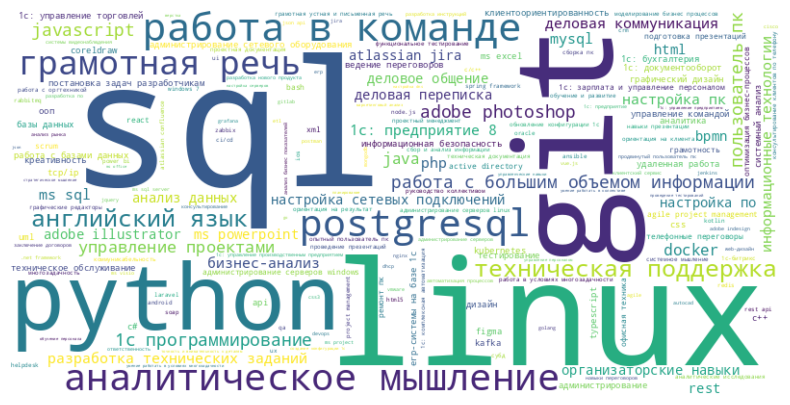

In [ ]:
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(skills_counter)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off');

Как видно, часто ищут вакансии со знаниями SQL, Linux, Git и Python; помимо этого работодатели обращают внимание на софт-скиллы: умение работать в команде, аналитически мыслить и грамотно выращать свои мысли.

### Зарплата

In [ ]:
print(f'''Количество пропусков в поле `salary`: {df['salary_currency'].isnull().sum()}''')
print(f'''Количество непустых записей в поле `salary`: {df['salary_currency'].notna().sum()}''')

df['salary_currency'].value_counts()

Количество пропусков в поле `salary`: 38360
Количество непустых записей в поле `salary`: 30410


,count
salary_currency,
RUR,28142
KZT,1025
USD,503
BYR,377
UZS,189
EUR,95
KGS,75
AZN,2
GEL,2


В большинстве вакансий, примерно в 93%, зарплата указана в рублях, в 3% – в тенге, также в редких случаях встречаются белорусские рубли, евро и другие валюты

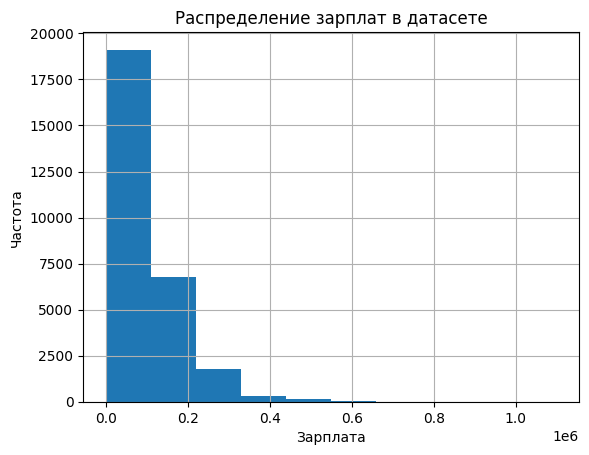

In [ ]:
df['salary'] = df[['salary_from', 'salary_to']].mean(axis=1)
df['salary'][df['salary_currency'] == 'RUR'].hist()
plt.xlabel('Зарплата')
plt.ylabel('Частота')
plt.title('Распределение зарплат в датасете');

In [ ]:
df.groupby('professional_roles_name')['salary'].mean()

,salary
professional_roles_name,
"BI-аналитик, аналитик данных",225654.166667
DevOps-инженер,218688.315217
Аналитик,173788.880334
"Арт-директор, креативный директор",299553.113208
Бизнес-аналитик,217793.653689
Гейм-дизайнер,213714.583333
Дата-сайентист,122602.857143
"Дизайнер, художник",158405.516935
Директор по информационным технологиям (CIO),391498.329114


### Распределение рублевых зарплат с выбросами и без

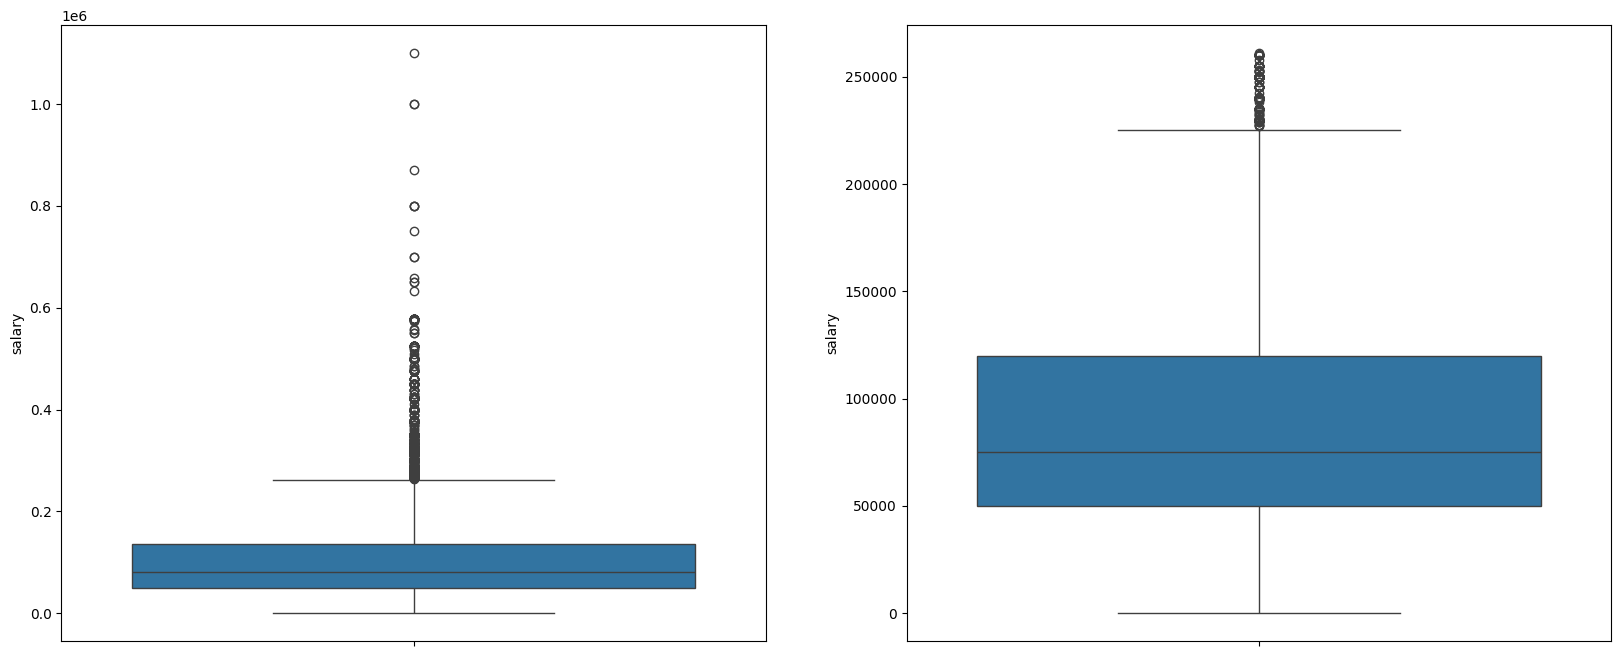

In [ ]:
(fig, (ax1,ax2)) = plt.subplots(1,2,figsize = (20,8))
RUR_salaries = df[df['salary_currency'] == 'RUR']
IQR = RUR_salaries['salary'].quantile(0.75) - RUR_salaries['salary'].quantile(0.25)
RUR_salaries_clipped = RUR_salaries[(RUR_salaries.salary > RUR_salaries.salary.quantile(0.25) - 1.5*IQR) &
                                    (RUR_salaries.salary < RUR_salaries.salary.quantile(0.75) + 1.5*IQR)]
sns.boxplot(data = RUR_salaries, y = 'salary', ax = ax1)
sns.boxplot(data = RUR_salaries_clipped, y = 'salary', ax = ax2);

### Cтатистика зарплат по ролям

In [ ]:
df[df['salary_currency'] == 'RUR'].groupby(['role']) \
.agg(avg_salary = ('salary','mean'),
     median_salary = ('salary','median'),
     count = ('salary','nunique')) \
     .sort_values(by = 'avg_salary', ascending = False) \
     .round()

,avg_salary,median_salary,count
role,,,
scientist,250056.0,280000.0,11
developer,151162.0,140000.0,414
manager,130995.0,100000.0,312
analyst,122348.0,100000.0,269
tester,110564.0,100000.0,84
engineer,84472.0,70000.0,317
consultant,82432.0,67500.0,188
other,73561.0,60000.0,155
admin,73416.0,60000.0,285


### Статистика зарплат по направлениям

In [ ]:
df[df['salary_currency'] == 'RUR'].groupby(['field']) \
.agg(avg_salary = ('salary','mean'),
     median_salary = ('salary','median'),
     count = ('salary','nunique')) \
     .sort_values(by = 'avg_salary', ascending = False) \
     .round()

,avg_salary,median_salary,count
field,,,
business,163750.0,150000.0,5
product,155527.0,150000.0,75
data,137181.0,100000.0,98
project,126076.0,100000.0,181
bi,119433.0,100000.0,148
other,116042.0,90000.0,672
technical,89487.0,62500.0,611
system,89005.0,70000.0,321
design,75815.0,60000.0,110


Статистика зарплат по ролям и направлениям

In [ ]:
df[df['salary_currency'] == 'RUR'].groupby(['role','field']) \
.agg(avg_salary = ('salary','mean'),
     median_salary = ('salary','median'),
     count = ('salary','nunique')) \
     .sort_values(by = 'avg_salary', ascending = False) \
     .round()

avg_salary  median_salary  count
role       field                                     
scientist  data        250056.0       280000.0     11
developer  product     220692.0       225000.0      9
           business    200000.0       200000.0      1
engineer   product     185000.0       185000.0      1
manager    business    180000.0       180000.0      1
...                         ...            ...    ...
specialist bi           57563.0        50000.0     36
consultant design       55500.0        55500.0      1
engineer   support      51900.0        57000.0      5
specialist support      50833.0        52500.0      5
other      design       30000.0        30000.0      1

[82 rows x 3 columns]

### Распределение рублевых зарплат с группировкой по кол-ву опыта с выбросами и без

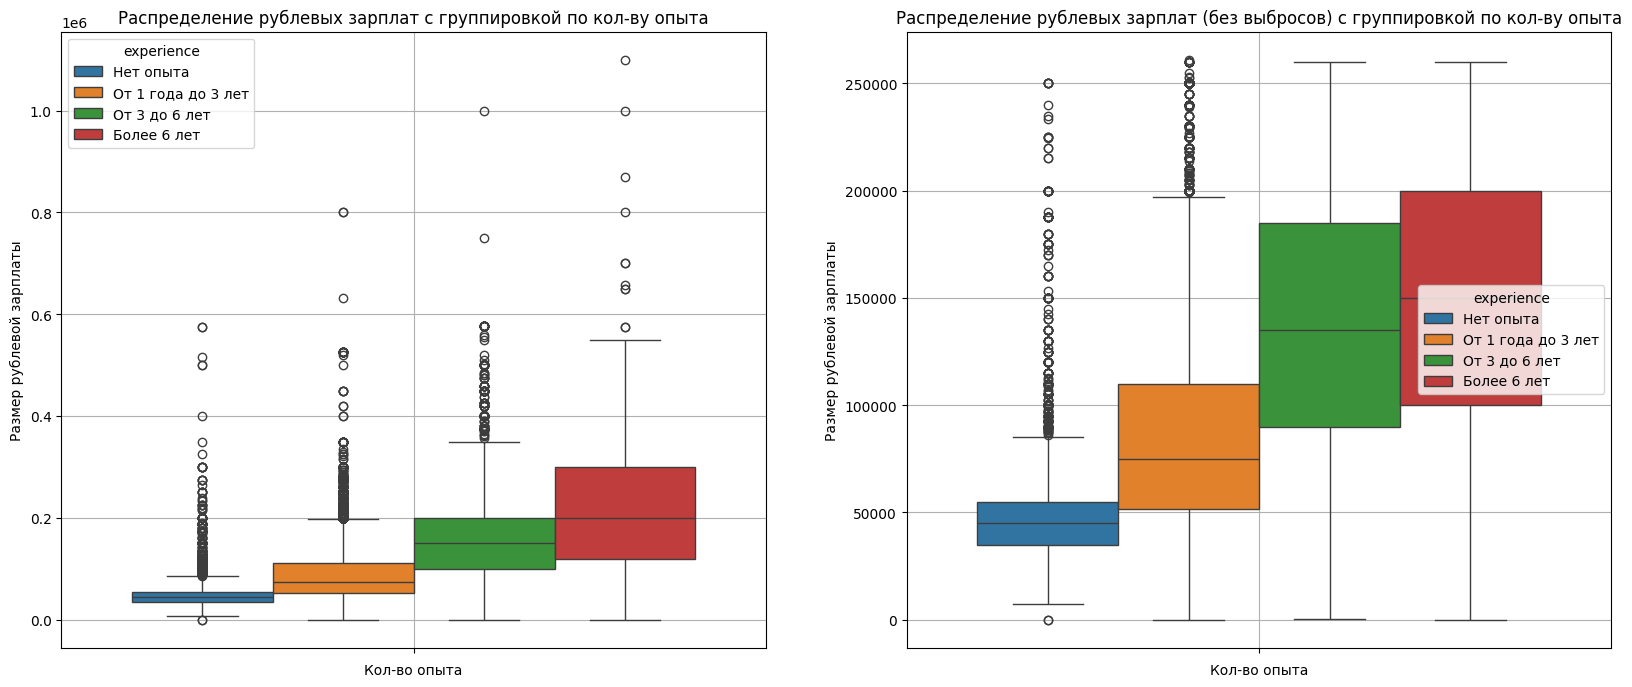

In [ ]:
experience_order = ['Нет опыта','От 1 года до 3 лет','От 3 до 6 лет','Более 6 лет']
(fig, (ax1,ax2)) = plt.subplots(1,2,figsize = (20,8))
RUR_salaries = df[df['salary_currency'] == 'RUR']
IQR = RUR_salaries['salary'].quantile(0.75) - RUR_salaries['salary'].quantile(0.25)
RUR_salaries_clipped = RUR_salaries[(RUR_salaries.salary > RUR_salaries.salary.quantile(0.25) - 1.5*IQR) &
                                    (RUR_salaries.salary < RUR_salaries.salary.quantile(0.75) + 1.5*IQR)]

sns.boxplot(data = RUR_salaries,
            y = 'salary',
            hue = 'experience',
            hue_order = experience_order,
            ax = ax1)

sns.boxplot(data = RUR_salaries_clipped,
            y = 'salary',
            hue = 'experience',
            hue_order = experience_order,
            ax = ax2)

ax1.set_title('Распределение рублевых зарплат с группировкой по кол-ву опыта')
ax1.set_ylabel('Размер рублевой зарплаты')
ax1.set_xlabel('Кол-во опыта')
ax1.grid()

ax2.set_title('Распределение рублевых зарплат (без выбросов) с группировкой по кол-ву опыта')
ax2.set_ylabel('Размер рублевой зарплаты')
ax2.set_xlabel('Кол-во опыта')
ax2.grid()

Опыт закономерно влияет на размер предлагаемой зарплаты. В категории без опыта видно много "залетных" вакансий, которые скорее всего предполагают не 0 опыта, но чтобы не отсекать аудиторию, эйчары так выставляют (гипотеза). Предлагаются высокие зп (сравнимые с большим кол-вом опыта) для нулевого стажа.

### Компании

In [ ]:
df['employer_name'].value_counts()

,count
employer_name,
СБЕР,1341
Ozon,889
Яндекс Крауд,754
МТС,606
Тинькофф,531
...,...
АтомЭнергоСнаб,1
Декаст Инжиниринг,1
Сеть супермаркетов ДА!,1


In [ ]:
df['employer_name'].value_counts().head(10)

,count
employer_name,
СБЕР,1341
Ozon,889
Яндекс Крауд,754
МТС,606
Тинькофф,531
"Иннотех, Группа компаний",512
Ростелеком,505
INSOFT,367
Яндекс,367


Здесь видны основные представители бигтеха: Яндекс, Озон и различные банки: Тинькофф, Сбер и другие

Посмотрим, что происходит с зарплатами в компаниях выше; в остальных компаниях вакансий меньше, так что среднее по ним считать будет не настолько репрезентативно

In [ ]:
big_employers = df['employer_name'].value_counts().head(10).index.to_list()

In [ ]:
df[df.employer_name.isin(big_employers)].groupby('employer_name')['salary'].mean().to_frame().sort_values(by = 'salary', ascending = False)

,salary
employer_name,
СБЕР,196607.407407
Тинькофф,100000.000000
МТС,66133.904110
Ростелеком,54047.321203
Яндекс Крауд,49995.697248
INSOFT,47704.359673
Ozon,46992.996109
Яндекс,28750.000000
ИК СИБИНТЕК,NaN


In [ ]:
df[df.employer_name.isin(big_employers)].groupby('employer_name')['salary'].max().to_frame().sort_values(by = 'salary', ascending = False)

,salary
employer_name,
СБЕР,500000.0
Яндекс Крауд,324000.0
МТС,250000.0
Ростелеком,250000.0
Тинькофф,100000.0
INSOFT,70000.0
Ozon,52000.0
Яндекс,32500.0
ИК СИБИНТЕК,NaN


In [ ]:
df[df.employer_name.isin(big_employers)].groupby('employer_name')['salary'].min().to_frame().sort_values(by = 'salary', ascending = False)

,salary
employer_name,
Тинькофф,100000.0
INSOFT,37500.0
Ozon,34000.0
СБЕР,29800.0
МТС,27000.0
Яндекс,25000.0
Яндекс Крауд,23400.0
Ростелеком,17500.0
ИК СИБИНТЕК,NaN


Как мы видим, цифры далеки от реалистичных: вряд ли разработчики в Яндексе получают не более 33000 рублей; можно сделать предположение, что бигтех публикует отерытые цифры по заработной плате только для сотрудников технической поддержки и на временную работу, а для основных вакансий эта информация закрыта под грифом корпоративной тайны

### Автоматическое EDA

In [ ]:
cols = ['id', 'area_name', 'salary','salary_currency', 'experience','salary_gross', 'employer_name', 'accredited_it_employer',
 'has_test', 'schedule', 'languages', 'employment', 'role', 'field']
#  ['id', 'area_name', 'salary_to', 'salary_from', 'salary_currency', 'employer_name', 'experience','salary_gross', 'accredited_it_employer',
#  'has_test', 'schedule', 'languages', 'employment', 'key_skills', 'description', 'professional_roles_name', 'region_name', 'country_name']
profile_report = ProfileReport(df[cols], title='Pandas Profiling Report')

profile_report

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Выводы:
* Больше половины вакансий без зарплат
* Большинство вакансий в рублях
* Большая часть вакансий из Москвы, Санкт-Петербурга и других крупных городов России
* Больше всего вакансий требуют от 1 до 3 лет опыта - около 50%
* В 2 раза чаще указывают зп на руки (чем до налогов)
* абсолютное большинство вакансий с полной занятостью
* Четверть спроса идет на разработчиков, потом менеджеры, аналитики и технические специалисты (поддержка и т.д.)
* Сильных корреляций с зп не видно (вероятно, из-за шума)

### Итоги

Используемый набор данных даёт общее представление о рынке IT в России и странах СНГ: какие направления существуют на рынке, какие навыки и знания ждут от кандидатов на различные позиции, и что работодатели готовы предложить кандидатам на трудоустройство. Датасет, несомненно, имеет свои недостатки, например, обилие пропусков, а также значительный перекос данных в сторону крупных компаниях в Москве и Санкт-Петербурге, однако, это в целом отражает ситуацию, с которой сталкиваются люди, пытающие найти работу: часто работодатели скрывают информацию о размере заработной платы, а большинство предложений о трудоустройстве приходится на крупные города.

Дальнейшее развитие проекта будет нацелено на заполнение существующих пробелов в знаниях и понимании общей ситуации на IT-рынке РФ и СНГ, и создании инструментов, позволяющих внести ясность в происходящее для всех заинтересованных лиц, в частности, как для людей, только начинающих свой путь в индустрии информационных технологий, так и для тех, кто уже хорошо знаком с профессией, но желает быть в курсе происходящего на рынке